In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
!pip install youtube-comment-downloader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 6.7 MB/s eta 0:00:00


In [3]:
from youtube_comment_downloader import *

In [4]:
import pandas as pd
from youtube_comment_downloader import YoutubeCommentDownloader
import re

link = input("Youtube link: ")
saved = input("Output name: ")

# Extract video ID from the YouTube link
video_id_match = re.search(r'v=([a-zA-Z0-9_-]+)', link)
if video_id_match:
    video_id = video_id_match.group(1)
else:
    print("Invalid YouTube link. Please provide a valid link.")
    exit()

# Initialize the YoutubeCommentDownloader object
youtube = YoutubeCommentDownloader()

# Fetch video comments by passing the video ID to get_comments()
response = youtube.get_comments(youtube_id=video_id)

all_data = []
for i, comment in enumerate(response):
    print(comment)
    all_data.append(comment)
    if i >= 100:  # It will print the structure of the first 100 comments
        break
df = pd.DataFrame(all_data)
df.to_csv(saved)

#sample youtube link
#https://www.youtube.com/watch?v=DEAGS-IIWZA

Youtube link: https://www.youtube.com/watch?v=Pc8WdnIdXZg
Output name: youtube_comments
{'cid': 'UgxsH7Q8D39q3HrfNMB4AaABAg', 'text': 'Quick and precise, thanks big bruh', 'time': '7 dagen geleden', 'author': '@second1799', 'channel': 'UCCwa1sLcmQOo8bgsH0wYvBw', 'votes': '0', 'photo': 'https://yt3.ggpht.com/ytc/AIdro_k3vn_aPljUn5ZM7srfR5V5C8koZ4RaAqXIMxg66-Uu794VCABPuJBtzpY6mmvE=s176-c-k-c0x00ffffff-no-rj', 'heart': False, 'reply': False, 'time_parsed': 1708796809.99594}
{'cid': 'Ugyk73Ua1GlSl42Daf14AaABAg', 'text': 'Bro what to do if we already have a model dumped as model.joblib', 'time': '7 dagen geleden', 'author': '@Death-yd9vg', 'channel': 'UCqLWV8r8KU_TZkzRu3OSPbQ', 'votes': '0', 'photo': 'https://yt3.ggpht.com/m9DFiDGXuttL3fQEYvByBQHZzJocCrS7GNyscNBgj1LgRzg08VnqdnCTED8OrtluMS6gReV9=s176-c-k-c0x00ffffff-no-rj', 'heart': False, 'reply': False, 'time_parsed': 1708796810.002237}
{'cid': 'UgwFkiRtpgeEKF_GNDF4AaABAg', 'text': 'For every 1000 people selling you 10h course on the topic

In [5]:
print(df)

                                                   cid  \
0                           UgxsH7Q8D39q3HrfNMB4AaABAg   
1                           Ugyk73Ua1GlSl42Daf14AaABAg   
2                           UgwFkiRtpgeEKF_GNDF4AaABAg   
3                           UgyTIUpcJoI8npAjfAZ4AaABAg   
4                           UgxIB2cc1LbxXBTCrR14AaABAg   
..                                                 ...   
96   Ugz2eDZgAJVbHadfy9N4AaABAg.9HTcYkDhqw89HVA2LpcaM0   
97   Ugz2eDZgAJVbHadfy9N4AaABAg.9HTcYkDhqw89HVGosZX8Bk   
98   UgxFzXbWBo0LU-H3pax4AaABAg.9H9_dYVUsc09HCivRVVEP8   
99   UgydH6JK0NzeOmzJ55t4AaABAg.9GsZSY86vMc9GuyCQvcrNO   
100                         UgypmaFKfzZ0ZGJNl7Z4AaABAg   

                                                  text  \
0                   Quick and precise, thanks big bruh   
1    Bro what to do if we already have a model dump...   
2    For every 1000 people selling you 10h course o...   
3               Hey, I have a doubt can we connect plz   
4            

In [6]:
#Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re

In [7]:
data = pd.read_csv(saved)
data.columns

Index(['Unnamed: 0', 'cid', 'text', 'time', 'author', 'channel', 'votes',
       'photo', 'heart', 'reply', 'time_parsed'],
      dtype='object')

In [8]:
# Read the CSV file into a DataFrame
data = pd.read_csv(saved)

# Check the columns in the DataFrame
print(data.columns)

# Create a new DataFrame (data1) by dropping specified columns
columns_to_drop = ['Unnamed: 0', 'likes', 'time', 'user', 'userlink']
existing_columns = list(data.columns)
columns_to_drop = [col for col in columns_to_drop if col in existing_columns]  # Filter out non-existent columns

data1 = data.drop(columns=columns_to_drop, axis=1)

print(data1)

Index(['Unnamed: 0', 'cid', 'text', 'time', 'author', 'channel', 'votes',
       'photo', 'heart', 'reply', 'time_parsed'],
      dtype='object')
                                                   cid  \
0                           UgxsH7Q8D39q3HrfNMB4AaABAg   
1                           Ugyk73Ua1GlSl42Daf14AaABAg   
2                           UgwFkiRtpgeEKF_GNDF4AaABAg   
3                           UgyTIUpcJoI8npAjfAZ4AaABAg   
4                           UgxIB2cc1LbxXBTCrR14AaABAg   
..                                                 ...   
96   Ugz2eDZgAJVbHadfy9N4AaABAg.9HTcYkDhqw89HVA2LpcaM0   
97   Ugz2eDZgAJVbHadfy9N4AaABAg.9HTcYkDhqw89HVGosZX8Bk   
98   UgxFzXbWBo0LU-H3pax4AaABAg.9H9_dYVUsc09HCivRVVEP8   
99   UgydH6JK0NzeOmzJ55t4AaABAg.9GsZSY86vMc9GuyCQvcrNO   
100                         UgypmaFKfzZ0ZGJNl7Z4AaABAg   

                                                  text  \
0                   Quick and precise, thanks big bruh   
1    Bro what to do if we already have a 

In [9]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [10]:
data1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data1["text"]]
data1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data1["text"]]
data1["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data1["text"]]
data1['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data1["text"]]
score = data1["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05 :
        sentiment.append('Positive')
    elif i <= -0.05 :
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')
data1["Sentiment"] = sentiment
data1.head()


,cid,text,author,channel,votes,photo,heart,reply,time_parsed,Positive,Negative,Neutral,Compound,Sentiment
0,UgxsH7Q8D39q3HrfNMB4AaABAg,"Quick and precise, thanks big bruh",@second1799,UCCwa1sLcmQOo8bgsH0wYvBw,0,https://yt3.ggpht.com/ytc/AIdro_k3vn_aPljUn5ZM...,False,False,1.708797e+09,0.367,0.000,0.633,0.4404,Positive
1,Ugyk73Ua1GlSl42Daf14AaABAg,Bro what to do if we already have a model dump...,@Death-yd9vg,UCqLWV8r8KU_TZkzRu3OSPbQ,0,https://yt3.ggpht.com/m9DFiDGXuttL3fQEYvByBQHZ...,False,False,1.708797e+09,0.000,0.197,0.803,-0.4019,Negative
2,UgwFkiRtpgeEKF_GNDF4AaABAg,For every 1000 people selling you 10h course o...,@nicokalkusinski9320,UCE5I_tq8Qt47RG8sgK9W-HQ,0,https://yt3.ggpht.com/WgNa5FsYlnSSghW-VxX_IkUm...,False,False,1.708451e+09,0.000,0.000,1.000,0.0000,Neutral
3,UgyTIUpcJoI8npAjfAZ4AaABAg,"Hey, I have a doubt can we connect plz",@chetanyaksharma8668,UCXOArE_QH67_tFUFnkRBn9A,0,https://yt3.ggpht.com/pL171JWxunhO2XZOIHjM-QoT...,False,False,1.708192e+09,0.148,0.284,0.568,-0.2960,Negative
4,UgxIB2cc1LbxXBTCrR14AaABAg,Thanks bro,@pervezahmedshaik3774,UCJHqQtkrwEL7RDnxqyEMOgQ,0,https://yt3.ggpht.com/ytc/AIdro_n3yp0J1xdEu8TG...,False,False,1.706982e+09,0.744,0.000,0.256,0.4404,Positive


In [11]:
data2=data1.drop(['Positive','Negative','Neutral','Compound'],axis=1)
data2.head()

,cid,text,author,channel,votes,photo,heart,reply,time_parsed,Sentiment
0,UgxsH7Q8D39q3HrfNMB4AaABAg,"Quick and precise, thanks big bruh",@second1799,UCCwa1sLcmQOo8bgsH0wYvBw,0,https://yt3.ggpht.com/ytc/AIdro_k3vn_aPljUn5ZM...,False,False,1.708797e+09,Positive
1,Ugyk73Ua1GlSl42Daf14AaABAg,Bro what to do if we already have a model dump...,@Death-yd9vg,UCqLWV8r8KU_TZkzRu3OSPbQ,0,https://yt3.ggpht.com/m9DFiDGXuttL3fQEYvByBQHZ...,False,False,1.708797e+09,Negative
2,UgwFkiRtpgeEKF_GNDF4AaABAg,For every 1000 people selling you 10h course o...,@nicokalkusinski9320,UCE5I_tq8Qt47RG8sgK9W-HQ,0,https://yt3.ggpht.com/WgNa5FsYlnSSghW-VxX_IkUm...,False,False,1.708451e+09,Neutral
3,UgyTIUpcJoI8npAjfAZ4AaABAg,"Hey, I have a doubt can we connect plz",@chetanyaksharma8668,UCXOArE_QH67_tFUFnkRBn9A,0,https://yt3.ggpht.com/pL171JWxunhO2XZOIHjM-QoT...,False,False,1.708192e+09,Negative
4,UgxIB2cc1LbxXBTCrR14AaABAg,Thanks bro,@pervezahmedshaik3774,UCJHqQtkrwEL7RDnxqyEMOgQ,0,https://yt3.ggpht.com/ytc/AIdro_n3yp0J1xdEu8TG...,False,False,1.706982e+09,Positive


In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
stop_words = stopwords.words('english')
#The Porter stemming algorithm is used for reducing words to their root or base form by removing suffixes.
porter_stemmer = PorterStemmer()
#The Lancaster stemming algorithm is another method for reducing words to their base form, potentially producing more aggressive stemming compared to the Porter stemmer.
lancaster_stemmer = LancasterStemmer()
#The Snowball stemmer is an improvement over the original Porter stemmer, providing more accurate stemming.
snowball_stemer = SnowballStemmer(language="english")
#Lemmatization involves reducing words to their base or root form (lemma) based on their meaning. WordNet is a lexical database that the lemmatizer uses to determine the base form of a word.
lzr = WordNetLemmatizer()

In [14]:
def text_processing(text):
    text = text.lower()
    text = re.sub(r'\n',' ', text)
    text = re.sub('[%s]' % re.escape(punctuation), "", text)
    text = re.sub("^a-zA-Z0-9$,.", "", text)
    text = re.sub(r'\s+', ' ', text, flags=re.I)
    text = re.sub(r'\W', ' ', text)
    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])

    # stemming using porter stemmer from nltk package - msh a7sn 7aga - momken: lancaster, snowball
    # text=' '.join([porter_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([lancaster_stemmer.stem(word) for word in word_tokenize(text)])
    # text=' '.join([snowball_stemer.stem(word) for word in word_tokenize(text)])

    # lemmatizer using WordNetLemmatizer from nltk package
    text=' '.join([lzr.lemmatize(word) for word in word_tokenize(text)])

    return text

In [15]:
import nltk
#'Punkt' is a pre-trained unsupervised machine learning model for tokenization, which is the process of breaking down a text into individual words or tokens.
nltk.download('punkt')
#WordNet is a lexical database of the English language that includes information about words, their meanings, and relationships.
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [16]:
data_copy = data2.copy()
data_copy.text = data_copy.text.apply(lambda text: text_processing(text))

In [17]:
le = LabelEncoder()
data_copy['Sentiment'] = le.fit_transform(data_copy['Sentiment'])

In [18]:
processed_data = {
    'Sentence':data_copy.text,
    'Sentiment':data_copy['Sentiment']
}

processed_data = pd.DataFrame(processed_data)
processed_data.head()

,Sentence,Sentiment
0,quick precise thanks big bruh,2
1,bro already model dumped modeljoblib,0
2,every 1000 people selling 10h course topic one...,1
3,hey doubt connect plz,0
4,thanks bro,2


In [19]:
processed_data['Sentiment'].value_counts()

2    66
1    23
0    12
Name: Sentiment, dtype: int64

In [20]:
df_neutral = processed_data[(processed_data['Sentiment']==1)]
df_negative = processed_data[(processed_data['Sentiment']==0)]
df_positive = processed_data[(processed_data['Sentiment']==2)]

df_negative_upsampled = resample(df_negative,
                                 replace=True,
                                 n_samples= 205,
                                 random_state=42)

df_neutral_upsampled = resample(df_neutral,
                                replace=True,
                                n_samples= 205,
                                random_state=42)



# Concatenate the upsampled dataframes with the neutral dataframe
final_data = pd.concat([df_negative_upsampled,df_neutral_upsampled,df_positive])
final_data2 = pd.concat([df_negative,df_neutral,df_positive])

In [21]:
final_data['Sentiment'].value_counts()

0    205
1    205
2     66
Name: Sentiment, dtype: int64

In [22]:
final_data2['Sentiment'].value_counts()

2    66
1    23
0    12
Name: Sentiment, dtype: int64

In [23]:
corpus = []
for sentence in final_data['Sentence']:
    corpus.append(sentence)
corpus

['fake deployment local',
 'problem submit input website display prediction value check coding model error',
 'sklearn version used create model beacause getting modulenotfounderror module named sklearnlinearmodellogistic error due mismatch version',
 'error 500 internal server error trying deploy using cloudhahahahaha',
 'small doubt suppose integrated flask framework machine learning model need j react implement front end functionality used j well',
 'fake deployment local',
 'instance deployment failed install application dependency deployment failed',
 'showed server cant reached',
 'fake deployment local',
 'sklearn version used create model beacause getting modulenotfounderror module named sklearnlinearmodellogistic error due mismatch version',
 'sklearn version used create model beacause getting modulenotfounderror module named sklearnlinearmodellogistic error due mismatch version',
 'error 500 internal server error trying deploy using cloudhahahahaha',
 'small doubt suppose int

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = final_data.iloc[:, -1].values

In [25]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  0,  0],
       [ 1, 58,  0],
       [ 2,  0, 19]])

In [27]:
#To measure the accuracy of the sentiments
nb_score = accuracy_score(y_test, y_pred)
print('accuracy',nb_score)



accuracy 0.9790209790209791


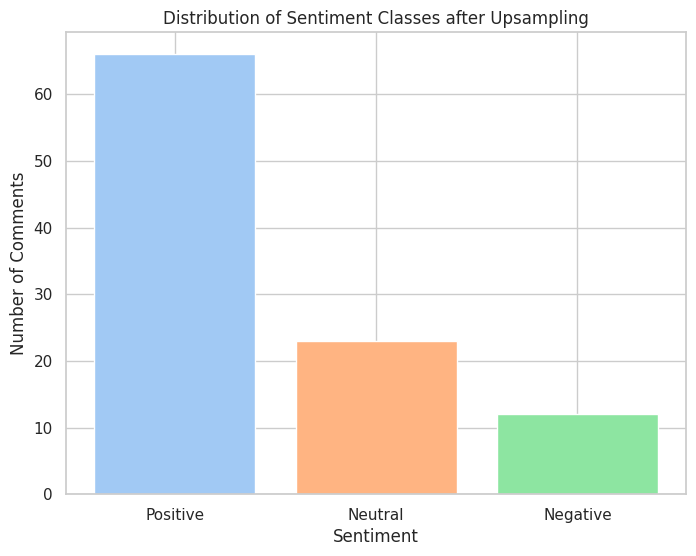

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'final_data' is the balanced dataset after upsampling
sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))

# Plot the distribution of sentiment classes
sentiment_counts = final_data2['Sentiment'].value_counts()
colors = sns.color_palette("pastel", len(sentiment_counts))

# Plot a bar graph with custom colors
plt.bar(sentiment_counts.index.map({0: 'Negative', 1: 'Neutral', 2: 'Positive'}), sentiment_counts.values, color=colors)
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.title('Distribution of Sentiment Classes after Upsampling')
plt.show()



In [29]:

positive_comments = final_data[final_data['Sentiment'] == 2]['Sentence'].tolist()

for comment in positive_comments:
    print(comment)

quick precise thanks big bruh
thanks bro
thanks needed little bit help
pls get code project
great explanation
amazing watching video could figure root cause bug fixed trying fix since two week hand youre amazing istg could actually cry omg
thank brother really wanted deploy model didnt know thank much
amazing explanation
hi bro thanks great video doubt regarding possible read data sensor add one field eg temperature possible implement code
brother u know deploy ml model webpage using flask laravel please make content
well explained
please help brother ml model predicts stock price time series want make real time website model
thank
big help man explained code really well thanks lot
thanks lot man
bro created frontend music recommender creates playlist content playlist sent ml model output shown frontend use technique project
thank much
hello got predicted output help video im using dtreeviz library visualise output algo decision tree trying display application clicking submit button ca